- We will talk about the classification models performance evaluation methods: 
    - Receiver Operating Characteristic(ROC) Curve and
    - Area Under the ROC Curve (AUC)

- Classifiers generally don't return a simple “Yes-or-No” answer. 
- Mostly, a classification procedure will return a score along a range
- Ideally, the positive instances score towards one end of the scale, and the negative examples towards the other end. 
- It is up to the analyst to set a **threshold** on that score that separates what is considered a POSITIVE class or a NEGATIVE class.  

- The ROC Curve is a tool that helps to set the **best threshold**.

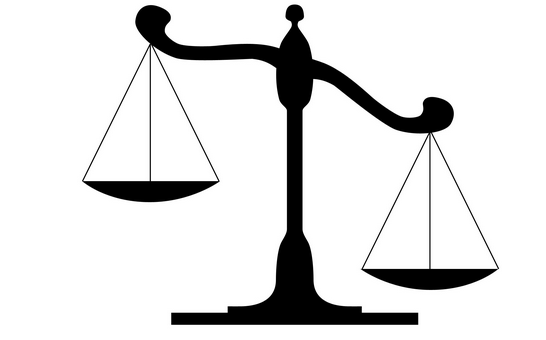

<!-- TEASER_END -->

- To understand the concept, here is a simple example of Logistic Regression for classification of mice as **obese** or **not obese** reagarding their weights. 
- X-axis shows the **weights**
- Y-axis shows the **probabilities** of the target variable (being obese)


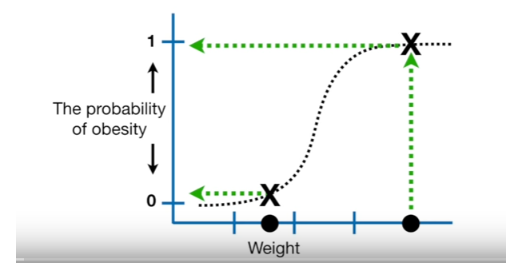

Example is taken from [this youtube channel](https://www.youtube.com/watch?v=xugjARegisk)

- We need to turn these probabilities into classification as **obese** or **not obese**
- One way to classify the mice is to set a threshold at $0.5$
- The samples with the probability over $0.5$ will be classified as **obese** and the ones below will be classified as **non-obese**

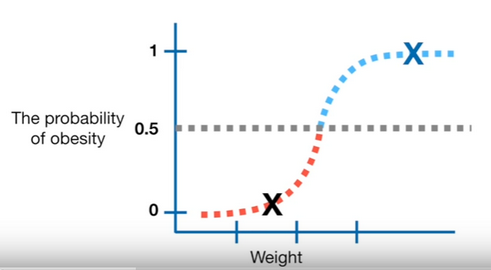

- To evaluate the efectiveness of the Logistic Regression with the classification **threshold set to 0.5** we can test it with new samples (mice) that we know obese or not obese

- The blue ones are **actual obese** and the red ones are **actual not obese**

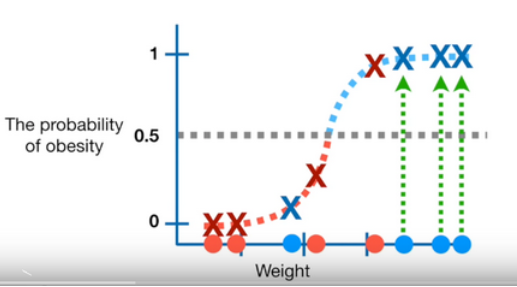

- When we look at the plot we see that 
    - 1 **actual obese**(blue) classified as **not obese** (under the threshold)
    - 1 **actual not obese**(red) classified as **obese** (over the threshold)
    - 3 actual obese and 3 actual not obese classified correctly


- Let's create a confusion matrix from these results

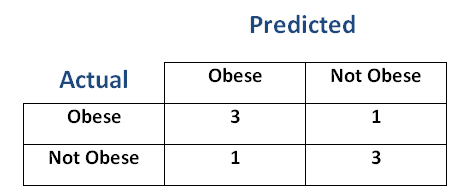

- With these results we can evaluate the performance of this Logistic Regression with the threshold set to $0.5$
    - `Sensitivity (Recall)`= $0.75$
    - `Specifity` = $0.75$

- What if we set the threshold to $0.1$ in order to be able classify all the **actual obese** samples as **obese**
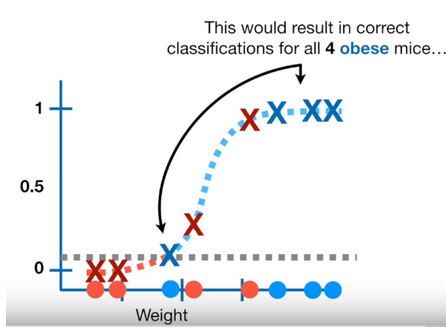


- When we move the threshold from $0.5$ to $0.1$, or visually thinking when we move the threshold bar towards the bottom
    - we classify the samples which stay above the bar are as POSITIVE(1) and the ones below the bar as NEGATIVE(0)
    - we give more chance to capture all the actual POSITIVE (actual obese) samples but 
    - some actual NEGATIVEs also stayed over the bar in the positive zone as a result
    - we increased the number of **TRUE**(ly) predicted **POSITIVE**s and  **FALSE**(ly) predicted as **POSITIVE**s

- Let's create a confusion matrix from these results

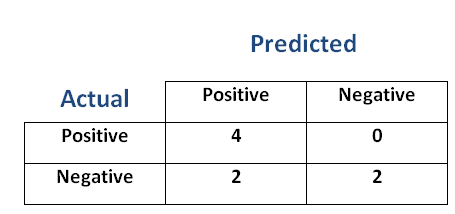

- With these results we can evaluate the performance of the Logistic Regression with the threshold set to 
$0.1$
    - `Sensitivity (Recall)`= $1.00$
    - `Specifity `= $0.5$
    
    
    
- We notice that True Positive Rate (Sensitivity) increased and True Negative Rate (Specifity) decreased
- There is a trade of between True Positive Rate and True Negative Rate 
- When we change the threshold generally one of them increases and the other decreases


### How can we find the optimal threshold?
- We can't compute confusion matrix for all the threshoslds but libraries like Sklearn can bring us the ROC curves
- ROC curves shows the results of all the possible thresholds

## Receiver Operating Characteristics (ROC CURVE)
- (Name comes from radar signals Receiver Operating Characteristics)

- A graph 

    - summarizes the performance of a binary classifier (two classes 1 or 0, positive or negative) **over all thresholds**

    - compares and visualizes the tradeoff between the model’s sensitivity and specificity.
    - generated by plotting **True Positive Rate** (y-axis) against **False Positive Rate** (x-axis)
    

- The values (x,y) of each point on the ROC curve changes by the classification threshold used for assigning observations to a given class

- We cannot compute the ROC curve from a confusion matrix.



- ROC curves have an attractive property: they are **insensitive to changes in class distribution**. 
- If the proportion of positive to negative instances changes in a test set, the ROC curves will not change. 


- Any performance metric that uses values from both columns (positive and negative) will be inherently sensitive to class skews. 
- Metrics such as **accuracy, precision, lift** and **F-score** use values from both columns of the confusion matrix. 

- As a class distribution changes these measures will change as well, even if the fundamental classifier performance does not. 


- ROC graphs are based upon True Positive Rate and False Positive Rate, in which each dimension is a strict columnar ratio, so do not depend on class distributions.



- ROC curves can only be used to assess classiﬁers that return some conﬁdence score (or a probability) of prediction. - For example, logistic regression, neural networks, and decision trees (and ensemble models based on decision trees) can be assessed using ROC curves. 

- `True Positive Rate= True Positive / All Positives`
- `False Positive Rate= False Positive/ All Negatives`

- Let's try to answer the question: **"How can we find the optimal threshold?"** by checking 3 thresholds (points) on the ROC curve below.


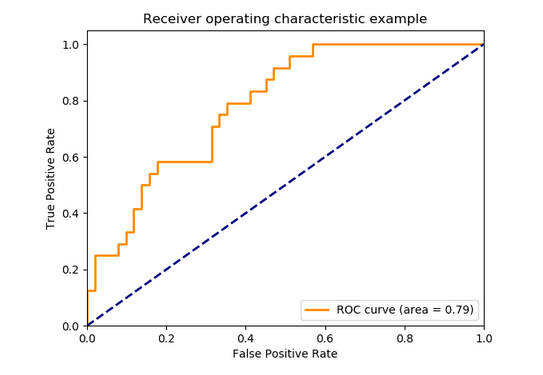

(By the way, any ROC curve generated from a finite set of samples is actually a step function, like above, which approaches a true curve as the number of instances approaches infinity)

- Threshold1: At the bottom-left, point $(0,0)$ (The threshold bar is at the top)
    - False Positive Rate (FPR):$0$ This is great. The classifier did not make identified any actual Negative sample as Positive 
    - True Positive Rate (TPR): $0$ This is awful. The classifier could not catch any of the True Positive samples
    


- Threshold2: At the top-left corner, point $(0.4, 0.8)$   
    - FPR:$0.4$ Classifier identified some negative samples as positive
    - TPR:$0.8$ Classifier showed a good performance on capturing the actual positives
    
    
    
- Threshold3: At the top-right, point $(1.0, 1.0)$ (The thereshold bar is at the bottom)
    - FPR:$1.0$ This is awful. Classifier identified all the actual negative samples as positive
    - TPR:$1.0$ Classifier showed a good performance on capturing all the actual positives
    
    
    
- So, the ideal point is therefore the top-left corner of the plot: false positives are close to $0$ and true positives are close $1$.

- Now, we know how to choose the optimal threshold for a classifier by ROC curve but **how can we choose the best performing model with ROC curves?**: 

- After plotting the ROC curves of some models we inspect
    - the top-left corner values on the curves and
    - the “steepness” of the curve, as this describes the **maximization of the true positive rate** while **minimizing the false positive rate**.

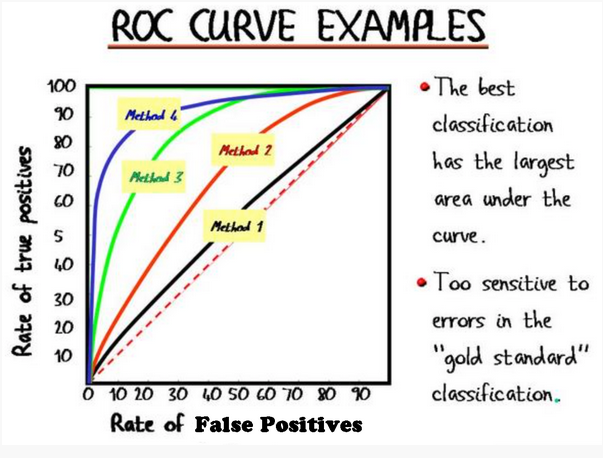

- This leads to another metric, **Area Under the Curve (AUC)**, which is a computation of the relationship between false positives and true positives

## Area Under the ROC Curve (AUC)
- To compare the optimal performances of different classifiers we can use the size of the area of each classifiers ROC curves

- As the picture displays the bigger area under the curve means the model of that curve can classify the actual positive and actual negatives better.

- Think of the red and green curves(distributions) like this: 
    - Firstly, they are not ROC curves, ROC curves are on the right side
    - We gave a validation dataset to some models and
    - models gave us the predict probability of each sample (e.g Sklearn with `predict_proba`)
    - Since we know the labels of them. We assosiated **green for the positives** and **red for the negatives**
    - We noticed that some models could separate two classes better than other. 
    - The more overlapping the worse classification performance

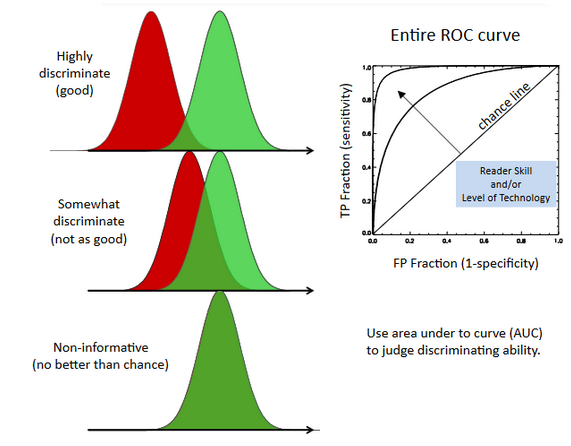

###  How to Interpret AUC?
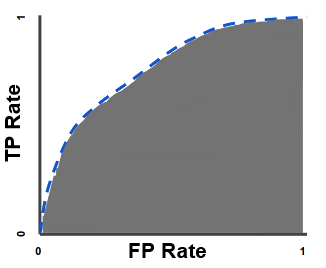


- AUC provides an **aggregate measure** of performance **across all possible classification thresholds**. 

 Let's try to interpret a model's AUC score which has a ROC curve like below:

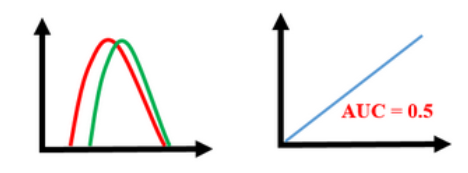

- For all the thresholds the values of **True Positive Rate (TPR)** and the **False Positive Rate(FPR)** (the proportion of negative examples predicted incorrectly) will be equal on the curve (The diagonal line **y=x**) 

- In order to get away from this diagonal into the upper triangular region, the classifier must exploit some information in the data. 



- Any classifier that appears in the lower right triangle performs worse than random guessing. 

- This triangle is therefore usually empty in ROC graphs. 



- If we negate a classifier that is, reverse its classification decisions on every instance its true positive classifications become false negative mistakes, and its false positives become true negatives. 

- Therefore, any classifier that produces a point in the lower right triangle can be negated to produce a point in the upper left triangle. 



- Any classifier on the diagonal may be said to have no information about the class. 

- A classifier below the diagonal may be said to have useful information, but it is applying the information incorrectly 


- We look for the model performance where True Positive Rate is significantly higher than False Positive Rate.
- This means that our ROC curve should satisfy the condition **y > x**
- This is the region of upper triangle

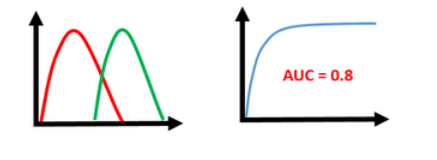

### Why is AUC a desirable metric? 

- AUC is **scale-invariant**. 
    - It measures how well predictions are ranked, rather than their absolute values.
    - AUC is based on the relative predictions, so any transformation of the predictions that preserves the relative ranking has no effect on AUC. 
    
    
- AUC is **classification-threshold-invariant**. 
    - It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
    
    - The amount of spread between predictions does not actually impact AUC. Even a prediction score for a randomly drawn true positive is only a tiny epsilon greater than a randomly drawn negative, that will count that as a success contributing to the overall AUC score.
    

However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:
- Scale invariance is not always desirable. 
- For example, sometimes we really do need **well calibrated probability outputs**, and AUC won’t tell us about that.

- **Classification-threshold invariance** is not always desirable. In cases where there are **wide disparities in the cost of false negatives vs. false positives**, it may be critical to minimize one type of classification error. 


### When AUC is not  suitable?

For example, when doing email spam detection, 
- you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). 
- AUC isn't a useful metric for this type of optimization.

- In practice, if you have a "perfect" classifier with an AUC of 1.0, you should be suspicious, as it likely indicates a bug in your model. 

- For example, you may have overfit to your training data, or the label data may be replicated in one of your features


- Without an explicit cost of error model (cost of false positives and separate cost of false negatives) you should always be suspicious of a single number summary of a classifier performance (be it accuracy, AUC, F1 or so on). 

- We in fact prefer using both precision and recall. If you insist on a single number: the F1 is a good heuristic measure of classifier quality, as it at least incorporates our operational choice of score threshold into the quality assessment. 

- The ROC curve is useful tool designing a classifier from a scoring function (though I prefer the “double hump graph”), but once you have chosen a threshold the performance of the other classifiers (induced by choosing different thresholds) are irrelevant to assessing the performance of the classifier you have settled on.

Sources: <br>
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc <br>

https://stackoverflow.com/questions/19984957/scikit-predict-default-threshold <br>

https://www.kaggle.com/kevinarvai/fine-tuning-a-classifier-in-scikit-learn <br>
https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification?rq=1 <br>

https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65 <br>

https://people.inf.elte.hu/kiss/11dwhdm/roc.pdf <br>